# Histogram Example

In coffea, histograms should use the `hist` package. This notebook walks through some basics of creating and filling a `hist` histogram, and also some basic plotting commands.

In [1]:
from hist import Hist, axis
import awkward as ak
import numpy as np
import mplhep as hep

Most of the work in creating a histogram is in making the axes. This is where you decide binning, whether you want continuous or categorical variables, axis names, axis labels, and other things.

Here, we define an axis for a continuous variable with `hist.axis.Regular`. We also define a categorical axis with fixed, defined possible entries (`FixedCategoryAxis`) and another without pre-defined possible entries (`VariableAxis`). These latter two are created with `hist.axis.StrCategory`, and accept strings when filling.

In [2]:
RealNumberAxis = axis.Regular(10,0.0,100.0,name="data")
FixedCategoryAxis = axis.StrCategory(['Cat','Dog'],name='animal',label='My Animal Axis')
VariableAxis = axis.StrCategory([],growth=True,name='color')

Now, we can create histograms of different dimensions by passing in the axes.

In [3]:
h1D = Hist(RealNumberAxis)
h2D = Hist(RealNumberAxis,FixedCategoryAxis)
h3D = Hist(RealNumberAxis,FixedCategoryAxis,VariableAxis)

Let's fill in some data. First, we'll fill the 1D histogram by passing it a 1D array of numbers. Notice that when we defined the axis `RealNumberAxis`, its name was `data`. That decides what the keyword argument should be when filling.

In [4]:
flat_data = ak.Array([1,2,3,95])
h1D.fill(data=flat_data)

Hist(Regular(10, 0, 100, name='data'), storage=Double()) # Sum: 4.0

When working with Awkward Array, we frequently end up with jagged (nested) arrays. We can only fill with 1D arrays of data, so the Awkward Array function `ak.ravel` is useful. This flattens the data and removes empty arrays, formatting it well for filling histograms.

In [5]:
jagged_data = ak.Array([[10,20,30],[45.3,47],[61],[],[37,37,38,39]])
h1D.fill(data=ak.ravel(jagged_data))

Hist(Regular(10, 0, 100, name='data'), storage=Double()) # Sum: 14.0

The `mplhep` package is useful for plotting HEP-style plots. It is built on top of matplotlib, but offers things like style sheets for some LHC experiments.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f781e9c36d0>, errorbar=None, legend_artist=None)]

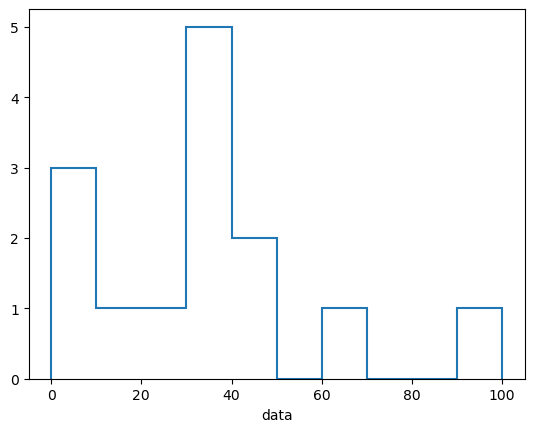

In [6]:
hep.histplot(h1D,yerr=False)

To fill the 2D histogram, we can either pass in one 1D array and a single value for the other axis, or two 1D arrays of equal length. In the former case, the single value is broadcasted to match every entry in the 1D array.

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f781685f310>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f7816885d50>, text=[])

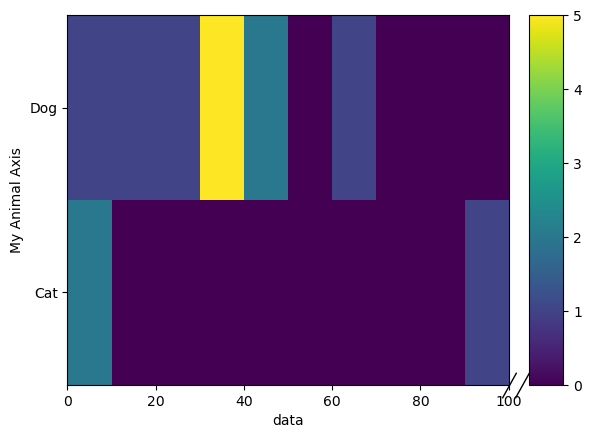

In [7]:
h2D.fill(data=ak.ravel(jagged_data),animal='Dog')
h2D.fill(data=ak.ravel(flat_data),animal=['Cat','Cat','Dog','Cat'])
hep.hist2dplot(h2D)

This extends to 3D histograms in the same way:

In [8]:
other_jagged_data = ak.Array([[52,30,35],[88,89]])
h3D.fill(data=flat_data,animal='Cat',color='red')
h3D.fill(data=ak.ravel(jagged_data),animal='Dog',color='blue')
h3D.fill(data=ak.ravel(other_jagged_data),animal='Cat',color='red')

Hist(
  Regular(10, 0, 100, name='data'),
  StrCategory(['Cat', 'Dog'], name='animal', label='My Animal Axis'),
  StrCategory(['red', 'blue'], growth=True, name='color'),
  storage=Double()) # Sum: 19.0

We can't plot all axes of the 3D histogram at the same time, but we can project down to 2 axes by summing/integrating over one of the axes. Here, we first sum over the `color` axis, so the resulting plot projects out that axis. Then, we instead sum over the `data` axis, just to see how we can project out a continuous variable's axis.

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f7816728550>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f781674b4f0>, text=[])

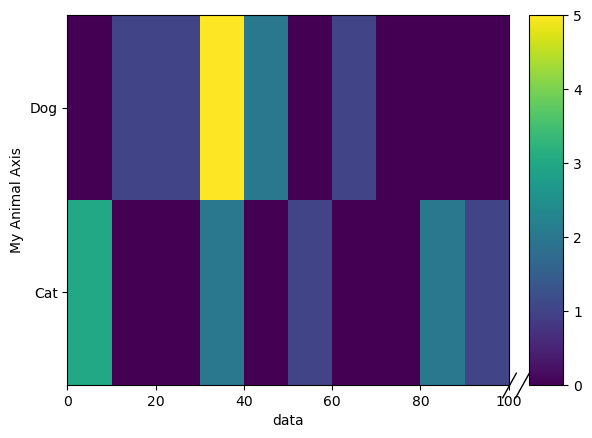

In [9]:
hep.hist2dplot(h3D[{'color': sum}])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f78167f5f90>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f781661caf0>, text=[])

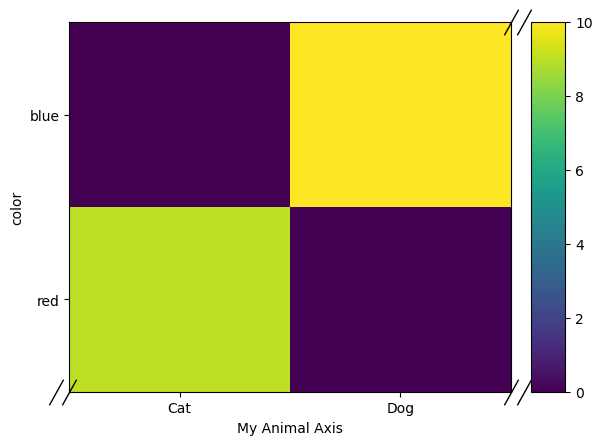

In [10]:
hep.hist2dplot(h3D[{'data': sum}])

We can also examine the actual values in the histogram's bins with `my_hist.values()`. This comes out as a nested numpy array, where the level of nesting corresponds to the number of dimensions of the histogram.

In [12]:
h3D.values()

array([[[3., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 1.]],

       [[0., 0.],
        [0., 1.]],

       [[2., 0.],
        [0., 5.]],

       [[0., 0.],
        [0., 2.]],

       [[1., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 1.]],

       [[0., 0.],
        [0., 0.]],

       [[2., 0.],
        [0., 0.]],

       [[1., 0.],
        [0., 0.]]])

Finally, information about the bins is accessible through the `axes` attribute of the histogram object. For example, we could get the centers of the bins for the continuous-valued variable.

In [13]:
h3D.axes[0].centers

array([ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.])